# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy import stats
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_df = pd.DataFrame(cities).rename(columns={0: "City"})
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Temperature"] = ""
weather_df["Humidity"] = ""
weather_df["Cloudiness"] = ""
weather_df["Wind Speed"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,,,,,,,,
1,mvuma,,,,,,,,
2,mar del plata,,,,,,,,
3,barrow,,,,,,,,
4,halalo,,,,,,,,
...,...,...,...,...,...,...,...,...,...
605,mrirt,,,,,,,,
606,akyab,,,,,,,,
607,champerico,,,,,,,,
608,la dorada,,,,,,,,


In [5]:
params = {
    "appid": weather_api_key,
    "units": "imperial"
}
weatherUrl = "http://api.openweathermap.org/data/2.5/weather?"
for index,row in weather_df.iterrows():
    city = row["City"]
    params["q"] = city
    print(f"Processing Record {index} | {city}")
    loopResponse = requests.get(weatherUrl, params=params).json()
    
    try:
        weather_df.loc[index, "Latitude"] = loopResponse['coord']['lat']
        weather_df.loc[index, "Longitude"] = loopResponse['coord']['lon']
        weather_df.loc[index, "Temperature"] = loopResponse['main']['temp']
        weather_df.loc[index, "Humidity"] = loopResponse['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = loopResponse['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = loopResponse['wind']['speed']
        weather_df.loc[index, "Country"] = loopResponse['sys']['country']
        weather_df.loc[index, "Date"] = loopResponse['dt']
        
    except KeyError:
        print("City not found. Skipping...")
        weather_df.loc[index, "Latitude"] = "N/A"
        weather_df.loc[index, "Longitude"] = "N/A"
        weather_df.loc[index, "Temperature"] = "N/A"
        weather_df.loc[index, "Humidity"] = "N/A"
        weather_df.loc[index, "Cloudiness"] = "N/A"
        weather_df.loc[index, "Wind Speed"] = "N/A"
        weather_df.loc[index, "Country"] = "N/A"
        weather_df.loc[index, "Date"] = "N/A"
    
        

Processing Record 0 | albany
Processing Record 1 | mvuma
Processing Record 2 | mar del plata
Processing Record 3 | barrow
Processing Record 4 | halalo
City not found. Skipping...
Processing Record 5 | east london
Processing Record 6 | rikitea
Processing Record 7 | sobolevo
Processing Record 8 | thompson
Processing Record 9 | brigantine
Processing Record 10 | zelenoborsk
Processing Record 11 | mataura
Processing Record 12 | nantucket
Processing Record 13 | bowen
Processing Record 14 | kodiak
Processing Record 15 | cape town
Processing Record 16 | hamilton
Processing Record 17 | barentsburg
City not found. Skipping...
Processing Record 18 | aktau
Processing Record 19 | hofn
Processing Record 20 | hilo
Processing Record 21 | atuona
Processing Record 22 | guayaramerin
Processing Record 23 | marzuq
Processing Record 24 | bredasdorp
Processing Record 25 | tasiilaq
Processing Record 26 | north myrtle beach
Processing Record 27 | tiksi
Processing Record 28 | kembe
Processing Record 29 | saldan

Processing Record 230 | tabiauea
City not found. Skipping...
Processing Record 231 | mount isa
Processing Record 232 | kalmunai
Processing Record 233 | umkomaas
Processing Record 234 | coruripe
Processing Record 235 | torbay
Processing Record 236 | roros
Processing Record 237 | natchitoches
Processing Record 238 | vestmannaeyjar
Processing Record 239 | teya
Processing Record 240 | havelock
Processing Record 241 | geraldton
Processing Record 242 | nakur
Processing Record 243 | khakhea
Processing Record 244 | hornepayne
Processing Record 245 | broome
Processing Record 246 | sorland
Processing Record 247 | lavrentiya
Processing Record 248 | saint-pierre
Processing Record 249 | hoquiam
Processing Record 250 | nayoro
Processing Record 251 | ilulissat
Processing Record 252 | tarko-sale
Processing Record 253 | severnyy
Processing Record 254 | doha
Processing Record 255 | dzhusaly
City not found. Skipping...
Processing Record 256 | kurilsk
Processing Record 257 | provideniya
Processing Record 

Processing Record 460 | luderitz
Processing Record 461 | gizo
Processing Record 462 | alyangula
Processing Record 463 | north branch
Processing Record 464 | berlevag
Processing Record 465 | cockburn town
Processing Record 466 | alegrete
Processing Record 467 | nishihara
Processing Record 468 | bandar-e lengeh
Processing Record 469 | sungaipenuh
Processing Record 470 | grand centre
City not found. Skipping...
Processing Record 471 | bathsheba
Processing Record 472 | majene
Processing Record 473 | peniche
Processing Record 474 | almaznyy
Processing Record 475 | mayumba
Processing Record 476 | manuk mangkaw
Processing Record 477 | vila franca do campo
Processing Record 478 | luangwa
Processing Record 479 | mareeba
Processing Record 480 | matara
Processing Record 481 | haines junction
Processing Record 482 | tyulgan
Processing Record 483 | vao
Processing Record 484 | san agustin
Processing Record 485 | auki
Processing Record 486 | alappuzha
Processing Record 487 | thinadhoo
Processing Reco

In [6]:
weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6,-73.97,28.78,86,36,3.67,US,1604123172
1,mvuma,-19.28,30.53,73.35,40,0,13.38,ZW,1604123553
2,mar del plata,-38,-57.56,48.52,93,0,5.82,AR,1604123259
3,barrow,71.29,-156.79,3.2,84,20,6.93,US,1604123102
4,halalo,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...
605,mrirt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
606,akyab,20.15,92.9,84.4,69,86,6.4,MM,1604123789
607,champerico,14.3,-91.92,64.02,96,28,7.63,GT,1604123264
608,la dorada,5.45,-74.66,72.57,87,41,0.96,CO,1604123789


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [10]:
cleanCityData_df = weather_df.loc[weather_df["Humidity"] != "N/A", :].reset_index(drop=True)
cleanCityData_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6,-73.97,28.78,86,36,3.67,US,1604123172
1,mvuma,-19.28,30.53,73.35,40,0,13.38,ZW,1604123553
2,mar del plata,-38,-57.56,48.52,93,0,5.82,AR,1604123259
3,barrow,71.29,-156.79,3.2,84,20,6.93,US,1604123102
4,east london,-33.02,27.91,59,87,20,6.93,ZA,1604123179
...,...,...,...,...,...,...,...,...,...
555,panjab,34.39,67.02,46.31,21,0,1.95,AF,1604123250
556,akyab,20.15,92.9,84.4,69,86,6.4,MM,1604123789
557,champerico,14.3,-91.92,64.02,96,28,7.63,GT,1604123264
558,la dorada,5.45,-74.66,72.57,87,41,0.96,CO,1604123789


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

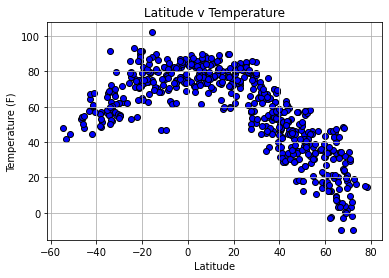

In [11]:
plt.scatter(cleanCityData_df["Latitude"], cleanCityData_df["Temperature"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

## Latitude vs. Humidity Plot

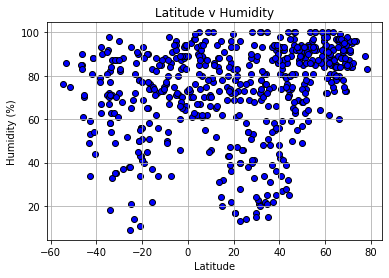

In [12]:
plt.scatter(cleanCityData_df["Latitude"], cleanCityData_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

## Latitude vs. Cloudiness Plot

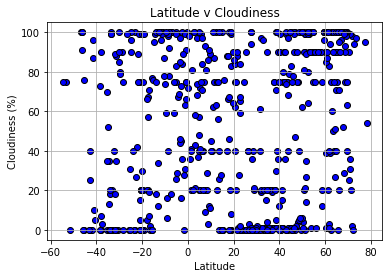

In [13]:
plt.scatter(cleanCityData_df["Latitude"], cleanCityData_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

## Latitude vs. Wind Speed Plot

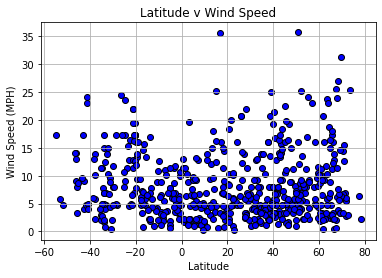

In [14]:
plt.scatter(cleanCityData_df["Latitude"], cleanCityData_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

## Linear Regression

In [26]:
northernHemi_df = cleanCityData_df.loc[cleanCityData_df["Latitude"] >= 0.01,:]
southernHemi_df = cleanCityData_df.loc[cleanCityData_df["Latitude"] <= -0.01,:]
northernHemi_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6,-73.97,28.78,86,36,3.67,US,1604123172
3,barrow,71.29,-156.79,3.2,84,20,6.93,US,1604123102
6,sobolevo,54.43,31.9,46.08,96,100,5.37,RU,1604123309
7,thompson,55.74,-97.86,17.6,85,90,9.17,CA,1604123103
8,brigantine,39.41,-74.36,39.87,86,1,8.05,US,1604123662
...,...,...,...,...,...,...,...,...,...
555,panjab,34.39,67.02,46.31,21,0,1.95,AF,1604123250
556,akyab,20.15,92.9,84.4,69,86,6.4,MM,1604123789
557,champerico,14.3,-91.92,64.02,96,28,7.63,GT,1604123264
558,la dorada,5.45,-74.66,72.57,87,41,0.96,CO,1604123789


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(6, 10, 'y = -1.04x + 91.94')

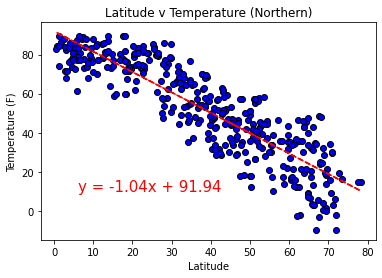

In [33]:
plt.scatter(northernHemi_df["Latitude"], northernHemi_df["Temperature"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Temperature (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

(slope, intercept, r, p, std_err) = stats.linregress(northernHemi_df["Latitude"].astype(float), northernHemi_df["Temperature"].astype(float))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
vc_fit = slope * northernHemi_df["Latitude"] + intercept

plt.plot(northernHemi_df["Latitude"],vc_fit,"--", color="red")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [27]:
southernHemi_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,mvuma,-19.28,30.53,73.35,40,0,13.38,ZW,1604123553
2,mar del plata,-38,-57.56,48.52,93,0,5.82,AR,1604123259
4,east london,-33.02,27.91,59,87,20,6.93,ZA,1604123179
5,rikitea,-23.12,-134.97,75.72,72,0,4.54,PF,1604123170
10,mataura,-46.19,168.86,53.01,85,100,14,NZ,1604123175
...,...,...,...,...,...,...,...,...,...
545,lufilufi,-13.87,-171.6,81.27,88,75,2.24,WS,1604123786
550,canete,-37.8,-73.4,53.2,63,7,2.15,CL,1604123787
551,alofi,-19.06,-169.92,75.2,88,99,16.11,NU,1604123177
552,llata,-9.42,-76.78,46.71,77,100,6.26,PE,1604123788


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-55, 95, 'y = 0.59x + 82.91')

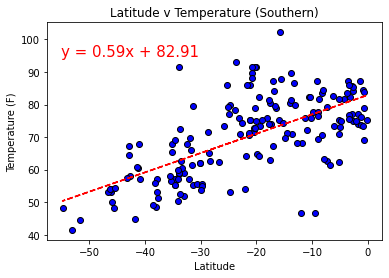

In [52]:
plt.scatter(southernHemi_df["Latitude"], southernHemi_df["Temperature"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Temperature (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

(slope, intercept, r, p, std_err) = stats.linregress(southernHemi_df["Latitude"].astype(float), southernHemi_df["Temperature"].astype(float))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
vc_fit = slope * southernHemi_df["Latitude"] + intercept

plt.plot(southernHemi_df["Latitude"],vc_fit,"--", color="red")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(45, 15, 'y = 0.3x + 63.3')

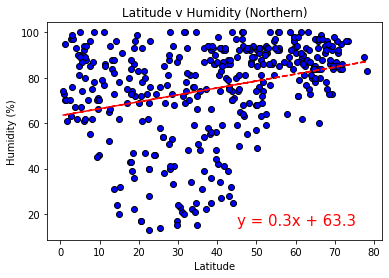

In [53]:
plt.scatter(northernHemi_df["Latitude"], northernHemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Humidity (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, r, p, std_err) = stats.linregress(northernHemi_df["Latitude"].astype(float), northernHemi_df["Humidity"].astype(float))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
vc_fit = slope * northernHemi_df["Latitude"] + intercept

plt.plot(northernHemi_df["Latitude"],vc_fit,"--", color="red")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-55, 20, 'y = 0.18x + 73.2')

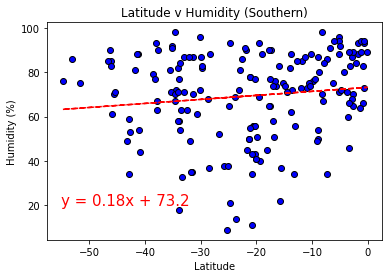

In [55]:
plt.scatter(southernHemi_df["Latitude"], southernHemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Humidity (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, r, p, std_err) = stats.linregress(southernHemi_df["Latitude"].astype(float), southernHemi_df["Humidity"].astype(float))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
vc_fit = slope * southernHemi_df["Latitude"] + intercept

plt.plot(southernHemi_df["Latitude"],vc_fit,"--", color="red")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(45, 10, 'y = 0.43x + 34.93')

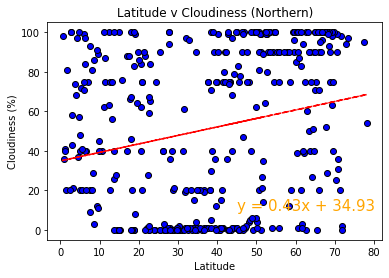

In [49]:
plt.scatter(northernHemi_df["Latitude"], northernHemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Cloudiness (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, r, p, std_err) = stats.linregress(northernHemi_df["Latitude"].astype(float), northernHemi_df["Cloudiness"].astype(float))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
vc_fit = slope * northernHemi_df["Latitude"] + intercept

plt.plot(northernHemi_df["Latitude"],vc_fit,"--", color="red")
plt.annotate(line_eq,(45,10),fontsize=15,color="orange")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-55, 15, 'y = 0.76x + 66.92')

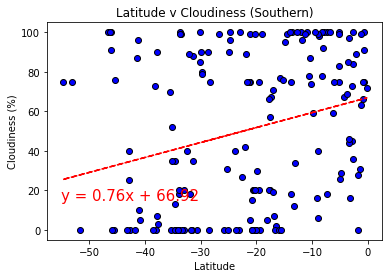

In [61]:
plt.scatter(southernHemi_df["Latitude"], southernHemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Cloudiness (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, r, p, std_err) = stats.linregress(southernHemi_df["Latitude"].astype(float), southernHemi_df["Cloudiness"].astype(float))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
vc_fit = slope * southernHemi_df["Latitude"] + intercept

plt.plot(southernHemi_df["Latitude"],vc_fit,"--", color="red")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(6, 30, 'y = 0.04x + 6.32')

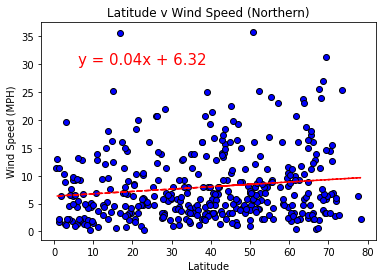

In [51]:
plt.scatter(northernHemi_df["Latitude"], northernHemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Wind Speed (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

(slope, intercept, r, p, std_err) = stats.linregress(northernHemi_df["Latitude"].astype(float), northernHemi_df["Wind Speed"].astype(float))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
vc_fit = slope * northernHemi_df["Latitude"] + intercept

plt.plot(northernHemi_df["Latitude"],vc_fit,"--", color="red")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-55, 20, 'y = -0.09x + 6.56')

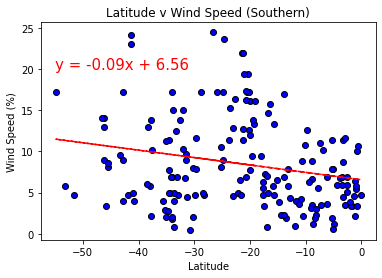

In [63]:
plt.scatter(southernHemi_df["Latitude"], southernHemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude v Wind Speed (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

(slope, intercept, r, p, std_err) = stats.linregress(southernHemi_df["Latitude"].astype(float), southernHemi_df["Wind Speed"].astype(float))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
vc_fit = slope * southernHemi_df["Latitude"] + intercept

plt.plot(southernHemi_df["Latitude"],vc_fit,"--", color="red")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")